# Median Absolute Deviation (MAD) and Average Absolute Deviation (AAD)
[From wikipedia:](https://en.wikipedia.org/wiki/Average_absolute_deviation)

>The average absolute deviation (AAD) of a data set is the average of the absolute deviations from a central point. It is a summary statistic of statistical dispersion or variability. In the general form, the central point can be an average, median, mode, or the result of any other measure of central tendency or any reference value related to the given data set. It includes the average absolute deviation (AAD) and the median absolute deviation (MAD). 

1. Average Absolute Deviation around the average (AAD)
2. Average Absolute Deviation around the median
3. Median Absolute deviation around the average
4. Median Absolute deviation around the median (MAD)

$ MAD = \frac{1}{N}\sum_{i=1}^N |x_i - m(x)| \quad $ where $m(x)$ might be measure of central tendency, usually the average, median or mode.

## Real-world example

In [1]:
from sklearn.datasets import load_diabetes
from scipy.stats import pareto, cauchy

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = load_diabetes(as_frame=True, scaled=False)
df.frame

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0,178.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0,104.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0,132.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0,220.0


In [3]:
def compute_stats(df, var):
    stats = {}
    stats["median"] = df[var].median()
    stats["mean"] = df[var].mean()
    stats["variance"] = df[var].var()
    stats["std"] = df[var].std()
    stats["mean_absolute_deviation_around_mean"] = abs(df[var] - stats["mean"]).mean()
    stats["median_absolute_deivation_around_mean"] = abs(df[var] - stats["mean"]).median()
    stats["mean_absolute_deviation_around_median"] = abs(df[var] - stats["median"]).mean()
    stats["median_absolute_deviation_around_median"] = abs(df[var] - stats["median"]).median()
    stats["coefficient_of_variation"] = stats["std"] / stats["mean"]
    stats["mean_aad_ratio"] = stats["mean_absolute_deviation_around_mean"]/stats["mean"]
    stats["madm_median_ratio"] = stats["median_absolute_deviation_around_median"]/stats["median"]
    return stats

def print_stats(var, stats):
    print(f"{var} mean: {stats["mean"]:.3f}")
    print(f"{var} median: {stats["median"]}")
    print(f"{var} variance: {stats["variance"]:.3f}")
    print(f"{var} standard deviation: {stats["std"]:.3f}")
    print(f"{var} mean absolute deviation around mean: {stats["mean_absolute_deviation_around_mean"]:.3f}")
    print(f"{var} mean absolute deviation around median: {stats["mean_absolute_deviation_around_median"]:.3f}")
    print(f"{var} median absolute deviation around mean: {stats["median_absolute_deivation_around_mean"]:.3f}")
    print(f"{var} median absolute deviation around median: {stats["median_absolute_deviation_around_median"]:.3f}")
    print(f"{var} coefficient of variation: {stats["coefficient_of_variation"]:.3f}")
    print(f"{var} AAD/mean ratio: {stats["mean_aad_ratio"]:.3f}")
    print(f"{var} MADM/median ratio: {stats["madm_median_ratio"]:.3f}")

var = "bmi"
bmi_stats = compute_stats(df.frame, var)
print_stats(var, bmi_stats)

bmi mean: 26.376
bmi median: 25.7
bmi variance: 19.520
bmi standard deviation: 4.418
bmi mean absolute deviation around mean: 3.559
bmi mean absolute deviation around median: 3.515
bmi median absolute deviation around mean: 3.124
bmi median absolute deviation around median: 2.900
bmi coefficient of variation: 0.168
bmi AAD/mean ratio: 0.135
bmi MADM/median ratio: 0.113


The mean absolute deviation from the mean is less than or equal to the standard deviation; one way of proving this relies on Jensen's inequality. 

Notice: 
- standard deviation > 
- mean absolute deviation around mean > 
- mean absolute deviation around median > 
- median absolute deviation around mean > 
- median absolute deviation around median

The median absolute deviation is more robust than the mean absolute deviation to outliers.

The variance has an interpretability problem when working with data, it is difficult to interpret the value of variance given it has different units than the quantity measured. This problem does not occur for average absolute deviations since the units are the same as the quantity measured.

In [4]:
var = "bp"
bp_stats = compute_stats(df.frame, var)
print_stats(var, bp_stats)

bp mean: 94.647
bp median: 93.0
bp variance: 191.304
bp standard deviation: 13.831
bp mean absolute deviation around mean: 11.410
bp mean absolute deviation around median: 11.287
bp median absolute deviation around mean: 10.353
bp median absolute deviation around median: 10.000
bp coefficient of variation: 0.146
bp AAD/mean ratio: 0.121
bp MADM/median ratio: 0.108


## Interpretability of AAD

One can interpret the average absolute deviation from the mean as a measure of dispersion around a central point, in this case, the mean. 
It represents how far apart we expect a value to be from the central point.
It is also useful to compute the dispersion in relative terms, that is, what's the ratio between the AAD and the central point value?
The computation is similar and has a similar interpretation to the coefficient of variation ($CV =\frac{\sigma}{\mu}$). 

For example, from the computations above we see that the AAD of blood pressure (bp) is 12.1% (0.121) of the average value of bp, which has an easier interpretaion than the AAD of 11.4 bp points.

## Why do we need to apply absolute value to the deviations?

What happens if we forget to apply the absolute value to the differences between the values and the mean?

In [5]:
var = 'bmi'
mean = df.frame[var].mean()
diffs = df.frame[var] - mean
mean_diffs = diffs.mean()
print(f"mean: {mean}")
print(f"mean of diffs: {mean_diffs}")

mean: 26.37579185520362
mean of diffs: 4.179663151530001e-16



The mean difference from the mean is zero because one can imagine the mean of a sample as the center of mass or centroid of an object. Then, the distances from each data point to the object's center of mass from each side of the mass are balanced. Thus, the mean difference is zero around the object's center of mass. Mathematically:

$$ \overline{x} = \frac{1}{N}\sum_{i=1}^N x_i$$
$$  
\overline{\Delta_{\overline{x}}} = 
\frac{1}{N}\sum_{i=1}^N (x_i - \overline{x}) = 
\frac{1}{N}\sum_{i=1}^N x_i - \frac{1}{N}\sum_{i=1}^N \overline{x} =
\overline{x} - \frac{1}{N}\sum_{i=1}^N \overline{x} = 
\overline{x} - \frac{N}{N}\overline{x} = \overline{x} - \overline{x} = 0
$$

This can be interpreted such that the mean of a discrete set of points is the center of mass of a rod where we have placed equal weights at distances given by the data values. The rod origin would be placed at the minimum value in the data, its end at its maximum value, and the computed mean would be the centroid. In this place, one has to put the fulcrum such that the rod is at equilibrium because the weights balance each other out. This interpretation can be easily generalized to more dimensions to signify the center of mass of an object with more dimensions, such as a plane, 3d space, or multidimensional abstract space. 

As a result, if we forget to apply the absolute value the resulting mean of the differences is uninformative and zero as expected.

## Robustness
The median is more robust to outliers than the mean. The mean is affected by extreme values, while the median is not. 
For example, if we have a dataset with values [1, 2, 3, 4, 100], the mean is 22, while the median is 3.5. 
The median is a better measure of central tendency in this case because it is not affected by the extreme value of 100.

Thus, for datasets with outliers, the median is usually a better measure of central tendency than the mean.

In [6]:

b = 0.5
x_pareto = pd.DataFrame(pareto.rvs(b=b, size=100000),columns=["X"])
x_pareto_stats = compute_stats(x_pareto, "X")
print_stats("X", x_pareto_stats)

X mean: 957707.604
X median: 4.001579133341593
X variance: 76273250528502768.000
X standard deviation: 276176122.300
X mean absolute deviation around mean: 1911410.849
X mean absolute deviation around median: 957705.598
X median absolute deviation around mean: 957703.616
X median absolute deviation around median: 2.723
X coefficient of variation: 288.372
X AAD/mean ratio: 1.996
X MADM/median ratio: 0.680


Notice how the mean is much greater than the median. This is a sign of a right-skewed distribution. The mean is affected by the extreme values in the tail of the distribution, while the median is not. For skewed distributions such as the present case, using the average or median will significantly change the result from absolute deviation computations. The median deviations will be more robust to outliers and skewed distributions.

[From wikipedia](https://en.wikipedia.org/wiki/Median_absolute_deviation)
> Because the median absolute deviation from the median (MADM) is a more robust estimator of scale than the sample variance or standard deviation, it works better with distributions without a mean or variance, such as the Cauchy distribution or pareto distributions for some parameter configuration.
> Unlike the variance, which may be infinite or undefined, the population MAD is always a finite number. For example, the standard Cauchy distribution has undefined variance, but its MADM is 1.

Notice something interesting for the pareto distribution, the sample AAD is half the sample mean and the median deviation from the mean is the sample mean. This occurs only for the particular case where $b=0.5$.

## Relationship between MADM and distribution percentiles
> The population MAD is defined analogously to the sample MAD, but is based on the complete population rather than on a sample. For a symmetric distribution with zero mean, the population MAD is the 75th percentile of the distribution.

The Cauchy distribution is symmetric around zero but its variance and mean are undefined. However, we can still compute the median and the median absolute deviation from the median (MDAD), which is robust to long tails and outliers.



In [7]:
x_cauchy = pd.DataFrame(cauchy.rvs(size=10000),columns=["X"])
x_cauchy_stats = compute_stats(x_cauchy, "X")
print_stats("X", x_cauchy_stats)

X mean: 0.251
X median: 0.004306719028623292
X variance: 612.535
X standard deviation: 24.749
X mean absolute deviation around mean: 4.351
X mean absolute deviation around median: 4.331
X median absolute deviation around mean: 1.027
X median absolute deviation around median: 0.993
X coefficient of variation: 98.697
X AAD/mean ratio: 17.350
X MADM/median ratio: 230.473


I obtained values for the variance and mean for the sample even though the Cauchy distribution average and variance are not defined. If I run the cell multiple times, the sample average and variance will oscillate randomly, but the MADM will usually be reliable.

In [8]:
cauchy.ppf([0.25, 0.5, 0.75]) # 25th, 50th, 75th percentiles

array([-1.,  0.,  1.])

Notice how the 75th percentile with value 1 matches the MADM, and the 25th percentile with value -1 equals the negative value of MADM. The range (-MADM,+MADM) contains 50% of the distribution. Thus, for symmetric distributions, their interquartile range (IQR) equals twice their MADM.
So, the MADM can be used similarly to the standard deviation as a measure of dispersion around a central point, which quantifies the proportion of the distribution that is away from the given central point.

In [9]:
x_pareto_madm = x_pareto_stats["median_absolute_deviation_around_median"]
x_pareto_median = x_pareto_stats["median"]
x_pareto_mean = x_pareto_stats["mean"]
pareto_madm_lb = x_pareto_median - x_pareto_madm
pareto_madm_ub = x_pareto_median + x_pareto_madm
x_pareto_mean, x_pareto_median, x_pareto_madm

(np.float64(957707.6038245633), 4.001579133341593, 2.7225901897601177)

In [10]:
pareto_madm_lb, x_pareto_median, pareto_madm_ub

(1.2789889435814756, 4.001579133341593, 6.724169323101711)

In [11]:
pareto.cdf([pareto_madm_lb, x_pareto_median, pareto_madm_ub], b=b)

array([0.11576723, 0.50009867, 0.61436124])

Notice how the median plus and minus MADAM define a 50% interval even though the interval is not symmentric given that the distribution is not symmetric.

In [12]:
pareto.ppf([0.25, 0.5, 0.75], b=b) # 25th, 50th, 75th percentiles

array([ 1.77777778,  4.        , 16.        ])

For asymmetric distributions, the MADM won't equal the 75th percentile, nor does the negative value of the median equal the 25th percentile. However, the range given by $$ |median(X)| < MADM \quad \sim \quad (median(X)-MADM, median(X), median(X)+MADM)$$ will still contain 50% of the distribution.

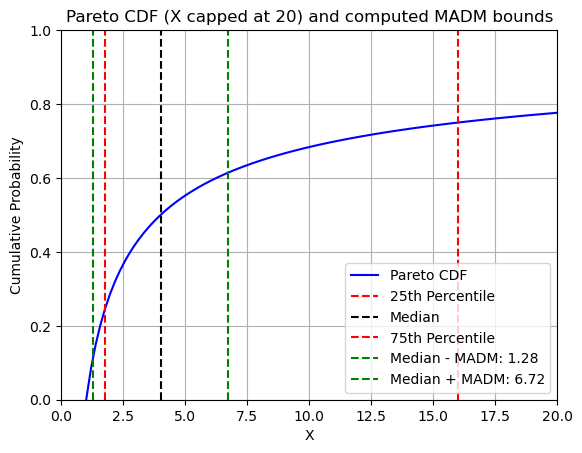

In [13]:

x_plot = np.linspace(1, 20, 100)
plt.plot(x_plot, pareto.cdf(x_plot, b=b), label='Pareto CDF', color='blue')
plt.axvline(x=pareto.ppf(0.25,b=b), color='r', linestyle='--', label='25th Percentile')
plt.axvline(x=4, color='k', linestyle='--', label='Median')
plt.axvline(x=pareto.ppf(0.75,b=b), color='r', linestyle='--', label='75th Percentile')
plt.axvline(x=pareto_madm_lb, color='g', linestyle='--', label=f'Median - MADM: {pareto_madm_lb:.2f}')
plt.axvline(x=pareto_madm_ub, color='g', linestyle='--', label=f'Median + MADM: {pareto_madm_ub:.2f}')

plt.xlim(0, 20)
plt.ylim(0, 1)
plt.xlabel("X")
plt.ylabel("Cumulative Probability")
plt.title("Pareto CDF (X capped at 20) and computed MADM bounds")
plt.legend()
plt.grid()
plt.show()

In the future, I might explore the relationship between the MADM and the standard deviation (SD).